# Creating a Supervised Machine Learning Model with Bank Churn Dataset

### Problem - Try to determine if a customer would leave the bank

In [1]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
sns.set()

### Load the dataset

In [4]:
bank_data = pd.read_csv("Bank_churn_modelling.csv")

### Summarize the dataset

In [5]:
# Dimensions of dataset
bank_data.shape

(10000, 14)

In [6]:
# Peek at data
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Statistical Summary
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Class Distribution
bank_data.groupby('Exited').size()

Exited
0    7963
1    2037
dtype: int64

In [9]:
bank_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# Check for null values
bank_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Visualizing the dataset

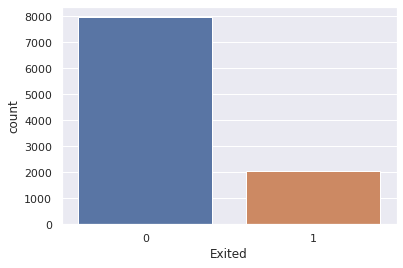

In [11]:
# Univariate plots
sns.countplot(x='Exited', data=bank_data);

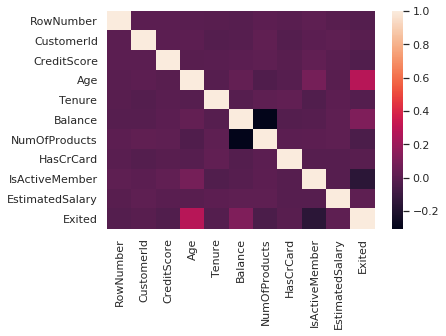

In [12]:
# Multivariate plot
sns.heatmap(bank_data.corr(), cbar=True)

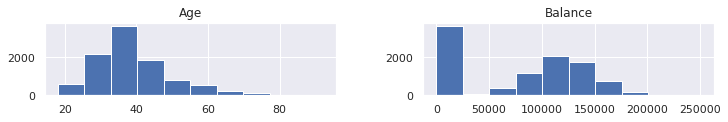

In [13]:
bank_data[['Age','Balance']].hist(layout = (6,2), figsize=(12,10))
plt.show()

In [14]:
# Feature Engineering using one hot encoder
bank_data_encoded = pd.get_dummies(bank_data, columns=['Surname','Gender','Geography'])

In [15]:
bank_data_encoded.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,1,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,1,0,0,0,1
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,1,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,1,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,1,0,0,0,1


In [16]:
bank_data_encoded.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       ...
       'Surname_Zubarev', 'Surname_Zubareva', 'Surname_Zuev', 'Surname_Zuyev',
       'Surname_Zuyeva', 'Gender_Female', 'Gender_Male', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object', length=2948)

In [17]:
# Feature Engineering using Ordinal Encoding - Label Encoder
bank_data_ordinal = pd.get_dummies(bank_data, columns=['Gender','Geography'])
LE = LabelEncoder()
bank_data_ordinal['Surname'] = LE.fit_transform(bank_data_ordinal['Surname'])

In [18]:
bank_data_ordinal.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,1115,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,2,15647311,1177,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,3,15619304,2040,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,4,15701354,289,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,5,15737888,1822,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


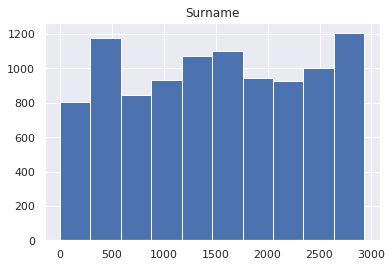

In [19]:
bank_data_ordinal[['Surname']].hist()
plt.show()

### Data Segregation

In [20]:
y = bank_data_encoded['Exited']

In [21]:
bank_data_encoded.drop(['Exited'],axis=1,inplace=True)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(bank_data_encoded, y, test_size=0.33, random_state=1)

In [23]:
x_train.shape

(6700, 2947)

In [24]:
y_train.shape

(6700,)

In [25]:
x_test.shape

(3300, 2947)

In [26]:
y_test.shape

(3300,)

### Build a Model

In [27]:
# Logistic Regression model
log_model = LogisticRegression(solver='liblinear', multi_class='ovr', verbose=1)

In [28]:
log_model.fit(x_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [29]:
# Model Evaluation
predictions = log_model.predict(x_test)

In [30]:
# Evaluate predictions
print(accuracy_score(y_test, predictions))

0.7906060606060606


In [31]:
#Gradient Boosting Classifier
grad_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,verbose=1)

In [32]:
grad_train =  grad_model.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.7933           17.20s
         2           0.7358           17.33s
         3           0.7091           17.31s
         4           0.6931           17.06s
         5           0.6887           16.76s
         6           0.6843           16.52s
         7           0.6812           17.08s
         8           0.6778           16.78s
         9           0.6748           16.50s
        10           0.6679           16.29s
        20           0.6372           14.05s
        30           0.6183           12.19s
        40           0.5983           10.42s
        50           0.5772            8.77s
        60           0.5644            6.99s
        70           0.5375            5.26s
        80           0.5252            3.50s
        90           0.5077            1.78s
       100           0.4844            0.00s


In [33]:
# Evaluate Predictions
grad_train.score(x_test, y_test)

0.8445454545454546

### Hyper Parameter Tuning

In [34]:
# Load algorithm without explicitly specified parameters
grad_model_2 = GradientBoostingClassifier(verbose=1)

In [35]:
# Specifying different values for hyper parameters
n_estimators_list = [100, 250, 500]
learning_rates = [0.1, 0.05]

In [36]:
# define grid search
grid = dict(n_estimators=n_estimators_list, learning_rate=learning_rates)

In [38]:
grid_search = GridSearchCV(estimator=grad_model_2, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9783           17.11s
         2           0.9573           17.00s
         3           0.9393           16.82s
         4           0.9236           17.98s
         5           0.9099           17.53s
         6           0.8976           17.19s
         7           0.8866           16.88s
         8           0.8764           16.66s
         9           0.8662           16.43s
        10           0.8559           16.18s
        20           0.7891           14.17s
        30           0.7488           12.41s
        40           0.7235           10.62s
        50           0.7052            8.88s
        60           0.6906            7.08s
        70           0.6789            5.44s
        80           0.6693            3.60s
        90           0.6612            1.79s
       100           0.6518            0.00s


In [41]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("")

means = grid_result.cv_results_['mean_test_score']

stds = grid_result.cv_results_['std_test_score']

params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):

    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.861194 using {'learning_rate': 0.05, 'n_estimators': 100}

0.859701 (0.004418) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.859700 (0.005280) with: {'learning_rate': 0.1, 'n_estimators': 250}
0.855522 (0.003427) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.861194 (0.002219) with: {'learning_rate': 0.05, 'n_estimators': 100}
0.861193 (0.004242) with: {'learning_rate': 0.05, 'n_estimators': 250}
0.860447 (0.004987) with: {'learning_rate': 0.05, 'n_estimators': 500}


### Check important features

In [42]:
#Gradient Boosting Classifier
grad_model_3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, verbose=1)

In [44]:
y1 = bank_data_ordinal['Exited']

In [45]:
bank_data_ordinal.drop(['Exited'],axis=1,inplace=True)

In [46]:
x1_train, x1_test, y1_train, y1_test = train_test_split(bank_data_ordinal, y1, test_size=0.33, random_state=1)

In [47]:
grad_3_training = grad_model_3.fit(x1_train, y1_train)

      Iter       Train Loss   Remaining Time 
         1           0.9546            1.55s
         2           0.9204            1.48s
         3           0.8944            1.45s
         4           0.8737            1.42s
         5           0.8541            1.40s
         6           0.8343            1.38s
         7           0.8178            1.37s
         8           0.8048            1.35s
         9           0.7939            1.33s
        10           0.7840            1.31s
        20           0.7191            1.16s
        30           0.6893            1.01s
        40           0.6712            0.86s
        50           0.6579            0.72s
        60           0.6448            0.58s
        70           0.6350            0.43s
        80           0.6265            0.28s
        90           0.6190            0.14s
       100           0.6128            0.00s


In [48]:
grad_3_training.score(x1_test, y1_test)

0.8621212121212121

Text(0.5, 1.0, 'Feature Importance')

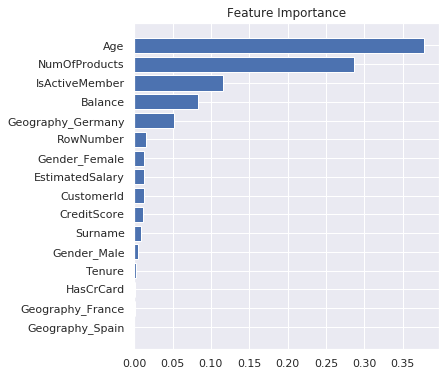

In [50]:
feature_importance = grad_model_3.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(bank_data_ordinal.columns.to_list())[sorted_idx])
plt.title('Feature Importance')

### Summary

#### Created a model with Logistic Regression algorithm with accuracy - 0.7906060606060606
#### Created a model with Gradient Boosting Classifier algorithm with accuracy - 0.8445454545454546
#### Created 6 different models with Gradient Boosting Classifier algorithm using hyper parameter tuning with accuracies as - 
##### 0.859701 (0.004418) with: {'learning_rate': 0.1, 'n_estimators': 100}
##### 0.859700 (0.005280) with: {'learning_rate': 0.1, 'n_estimators': 250}
##### 0.855522 (0.003427) with: {'learning_rate': 0.1, 'n_estimators': 500}
##### 0.861194 (0.002219) with: {'learning_rate': 0.05, 'n_estimators': 100}
##### 0.861193 (0.004242) with: {'learning_rate': 0.05, 'n_estimators': 250}
##### 0.860447 (0.004987) with: {'learning_rate': 0.05, 'n_estimators': 500}
